# Titanic Dataset

## EDA & Cleaning: Exploring continuous features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

In [12]:
# Importing the required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd/gdrive

Mounted at /gdrive
/gdrive


In [3]:
# Mounting google drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Read csv files
titanic_data= '/content/drive/MyDrive/Summer_Learning/Ex_Files_Applied_Machine_Learning/Exercise_Files/titanic.csv'
titanic = pd.read_csv(titanic_data)
print(titanic.columns)
print()
titanic.head(5)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Drop all categorical features that are not needed to analyse the data
feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic.drop(feat, axis=1, inplace=True)
titanic.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


## Explore continous features

In [20]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# It was observed in count above described there is some missing data for age
# Survive is binary either people alive or dead, we will use mean to see if people survived in dataset
# Now this statemnt will group the dataset into two groups who survived on not and will return average value
titanic.groupby('Survived').mean()


,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [22]:
# Removing null values from age
# gives true or false based on row has null value or not
titanic.groupby(titanic['Age'].isnull()).mean()


,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


## Fill missing value for age

In [26]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,family_cnt
Age,,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.943978
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.745763


In [27]:
# Fill missing for Age by average age (it will not bias model)
titanic['Age'].fillna(titanic["Age"].mean(), inplace = True)
titanic.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
family_cnt    0
dtype: int64

In [28]:
titanic.head(10)
# average value will be in float 

,Survived,Pclass,Age,SibSp,Parch,Fare,family_cnt
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,1
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,1
4,0,3,35.000000,0,0,8.0500,0
5,0,3,29.699118,0,0,8.4583,0
6,0,1,54.000000,0,0,51.8625,0
7,0,3,2.000000,3,1,21.0750,4
8,1,3,27.000000,0,2,11.1333,2
9,1,2,14.000000,1,0,30.0708,1


In [35]:
# Drop SibSp and Parch
titanic.drop(['SibSp','Parch'], axis = 1, inplace= True)

KeyError: ignored

In [36]:
titanic.head()

,Survived,Pclass,Age,Fare,family_cnt,Family_cnt
0,0,3,22.0,7.2500,1,1
1,1,1,38.0,71.2833,1,1
2,1,3,26.0,7.9250,0,0
3,1,1,35.0,53.1000,1,1
4,0,3,35.0,8.0500,0,0


## Plot Continuous Features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


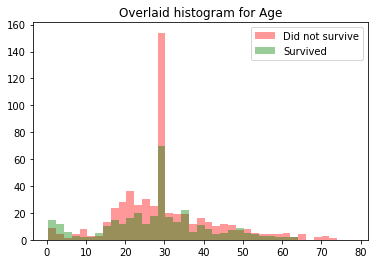

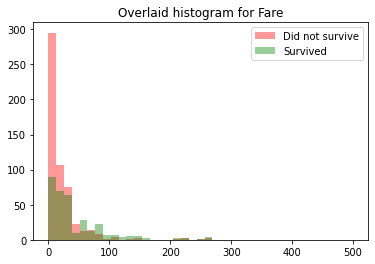

In [33]:
# Plot Continuous fetures
for i in ['Age', 'Fare']:
  died = list(titanic[titanic['Survived'] ==0 ][i].dropna())
  survived = list(titanic[titanic['Survived']==1][i].dropna())
  xmin = min(min(died), min(survived))
  xmax = max(max(died), max(survived))
  width = (xmax - xmin) / 40
  sns.distplot(died, color = 'r', kde = False, bins = np.arange(xmin, xmax, width))
  sns.distplot(survived, color = 'g', kde = False, bins = np.arange(xmin, xmax, width))
  plt.legend(['Did not survive', 'Survived'])
  plt.title('Overlaid histogram for {}'. format(i))
  plt.show()